# Looping Graph

---


## Graph 1


In [1]:
from typing import TypedDict, List


class AgentState(TypedDict):
    name: str
    number: List[int]
    counter: int

In [2]:
import random


def greeting_node(state: AgentState) -> AgentState:
    """Greeting Node which says hi to the person"""

    state["name"] = f"Hi there, {state["name"]}"
    state["counter"] = 0
    state["number"] = []
    return state


def random_node(state: AgentState) -> AgentState:
    """Generated a random number from 0 to 10"""

    state["number"].append(random.randint(0, 10))
    state["counter"] += 1
    return state


def should_continue(state: AgentState) -> str:
    """Function to decide what to do next"""

    if state["counter"] < 5:
        print("ENTERING LOOP", state["counter"])
        return "loop"
    else:
        return "exit"

In [3]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(AgentState)

# Add nodes to the graph
graph.add_node("greeting_node", greeting_node)
graph.add_node("random_node", random_node)

# Add edges to the graph
graph.add_edge(START, "greeting_node")
graph.add_edge("greeting_node", "random_node")
graph.add_conditional_edges(
    "random_node",
    should_continue,
    {
        "loop": "random_node",
        "exit": END,
    },
)

# Compile the graph
app = graph.compile()

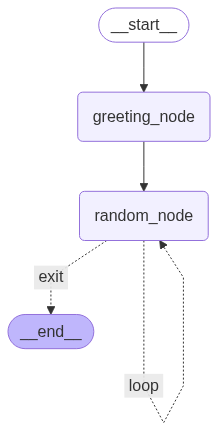

In [4]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [5]:
initial_state = AgentState(name="Yash")
result = app.invoke(initial_state)
result

ENTERING LOOP 1
ENTERING LOOP 2
ENTERING LOOP 3
ENTERING LOOP 4


{'name': 'Hi there, Yash', 'number': [2, 0, 4, 3, 1], 'counter': 5}

## Graph 2


In [ ]:
from typing import TypedDict, List


class AgentState(TypedDict):
    player_name: str
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    answer: int

In [31]:
import random


def setup_node(state: AgentState) -> AgentState:
    """This node is responsible to setup player"""

    state["player_name"] = f"Hi {state["player_name"]}, Welcome to the game"
    state["attempts"] = 0
    state["guesses"] = []
    return state


def guess_node(state: AgentState) -> AgentState:
    """In this node, player will guess the random number"""

    guess = random.randint(state["lower_bound"], state["upper_bound"])
    state["guesses"].append(guess)
    state["attempts"] += 1

    return state


def hint_node(state: AgentState) -> AgentState:
    """In this node, player will get the hint"""

    guess = state["guesses"][-1]
    if state["answer"] < guess:
        print("Higer")
        state["upper_bound"] = guess
    elif guess < state["answer"]:
        print("Lower")
        state["lower_bound"] = guess
    return state


def should_continue(state: AgentState) -> str:
    """Function to decide what to do next"""

    if state["guesses"][-1] == state["answer"] or state["attempts"] >= 7:
        return "end"
    return "continue"

In [32]:
from langgraph.graph import StateGraph, START, END

graph = StateGraph(AgentState)

# Add nodes to the graph
graph.add_node("setup_node", setup_node)
graph.add_node("guess_node", guess_node)
graph.add_node("hint_node", hint_node)

# Add edges to the graph
graph.add_edge(START, "setup_node")
graph.add_edge("setup_node", "guess_node")
graph.add_edge("guess_node", "hint_node")
graph.add_conditional_edges(
    "hint_node",
    should_continue,
    {"continue": "guess_node", "end": END},
)

# Compile the graph
app = graph.compile()

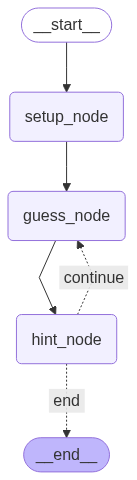

In [33]:
from IPython.display import Image, display

display(Image(app.get_graph().draw_mermaid_png()))

In [34]:
initial_state = AgentState(player_name="Yash", answer=17, lower_bound=1, upper_bound=20)
result = app.invoke(initial_state)
result

Higer
Lower
Lower
Higer
Higer
Lower
Lower


{'player_name': 'Hi Yash, Welcome to the game',
 'guesses': [19, 2, 14, 19, 19, 15, 15],
 'attempts': 7,
 'lower_bound': 15,
 'upper_bound': 19,
 'answer': 17}